In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import sklearn.metrics as metrics


In [2]:
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']

Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [3]:
df = pd.DataFrame(list(zip(Outlook, Temperature, Humidity, Wind, Play)),
               columns =['Outlook', 'Temp', 'Humidity', 'Wind', 'Class'])

In [4]:
df

,Outlook,Temp,Humidity,Wind,Class
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [5]:
dummy = pd.get_dummies(df, columns = ['Outlook', 'Temp', 'Humidity', 'Wind'])
print(dummy)

   Class  Outlook_Overcast  ...  Wind_False  Wind_True
0     No                 0  ...           1          0
1     No                 0  ...           0          1
2    Yes                 1  ...           1          0
3    Yes                 0  ...           1          0
4    Yes                 0  ...           1          0
5     No                 0  ...           0          1
6    Yes                 1  ...           0          1
7     No                 0  ...           1          0
8    Yes                 0  ...           1          0
9    Yes                 0  ...           1          0
10   Yes                 0  ...           0          1
11   Yes                 1  ...           0          1
12   Yes                 1  ...           1          0
13    No                 0  ...           0          1

[14 rows x 11 columns]


In [7]:
dummy = dummy.drop(['Class', 'Outlook_Sunny', 'Temp_Mild', 'Humidity_Normal', 'Wind_True'], axis=1)
dummy.head()

,Outlook_Overcast,Outlook_Rainy,Temp_Cool,Temp_Hot,Humidity_High,Wind_False
0,0,1,0,1,1,1
1,0,1,0,1,1,0
2,1,0,0,1,1,1
3,0,0,0,0,1,1
4,0,0,1,0,0,1


In [9]:
le = preprocessing.LabelEncoder()
y = df.iloc[:,-1].values
y= le.fit_transform(y) #labels
print(y)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [11]:
X= dummy.iloc[:,:].values
print(X)

[[0 1 0 1 1 1]
 [0 1 0 1 1 0]
 [1 0 0 1 1 1]
 [0 0 0 0 1 1]
 [0 0 1 0 0 1]
 [0 0 1 0 0 0]
 [1 0 1 0 0 0]
 [0 1 0 0 1 1]
 [0 1 1 0 0 1]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [1 0 0 0 1 0]
 [1 0 0 1 0 1]
 [0 0 0 0 1 0]]


In [13]:
from sklearn.model_selection import train_test_split
#split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.15, random_state = 121)

In [14]:
clf = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=121,random_state=121)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 1]


In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred,average="binary"))
print("Precision:",metrics.precision_score(y_test, y_pred,average="binary"))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.6666666666666666
Recall: 1.0
Precision: 0.6666666666666666
Confusion Matrix:
 [[0 1]
 [0 2]]


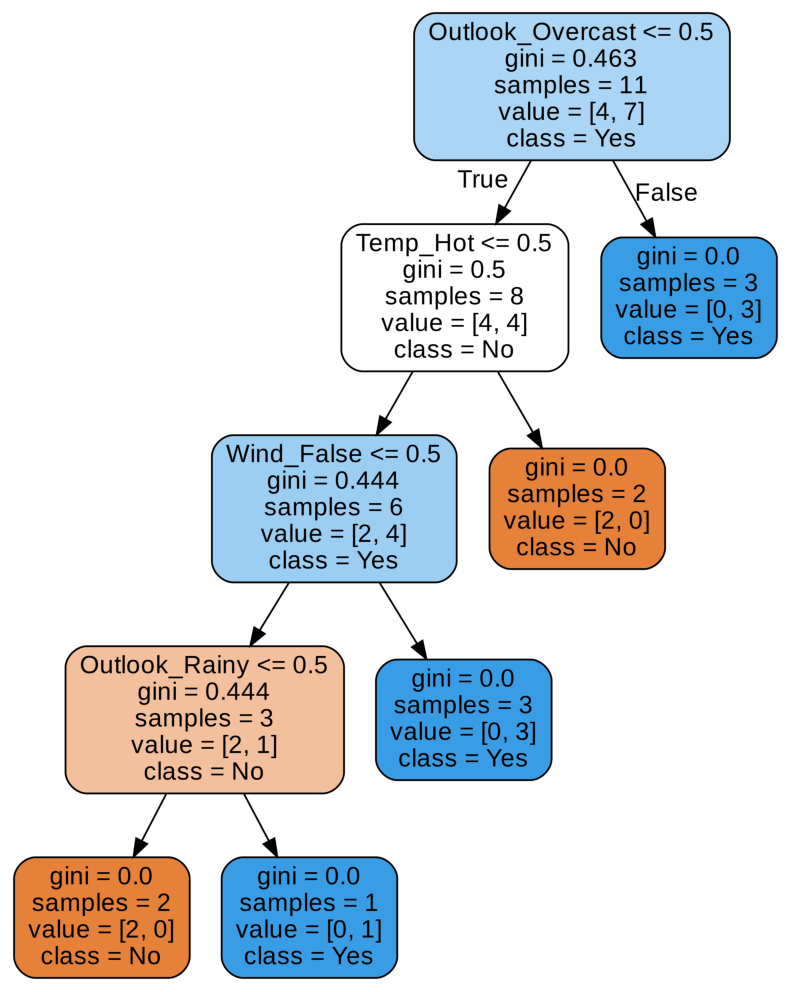

In [18]:
from sklearn.tree import export_graphviz

feature_names=['Outlook_Overcast',	'Outlook_Rainy',	'Temp_Cool',	'Temp_Hot',	'Humidity_High','Wind_False']
export_graphviz(clf,out_file='weather_tree.dot',feature_names=feature_names,class_names=['No','Yes'], filled=True,rounded=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'weather_tree.dot', '-o', 'weather_tree.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('weather_tree.png'))
plt.axis('off')
plt.show()


In [19]:
#1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?
test= [[0,1,0,0,0,1]]
out=clf.predict(test)
print(out)  #Output is Yes


[1]


In [20]:
#2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity=’High’, and Wind = ’True’?
test= [[0,0,1,0,1,0]]
out=clf.predict(test)
print(out)  #Output is NO

[0]


#Task 2

In [21]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [25]:
df = df.drop(columns=['Unnamed: 32'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [35]:
y=df['diagnosis']
y.head()


0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [39]:
dummy = pd.get_dummies(y)
dummy=dummy.drop(columns=['B'])  #dropping benign column
y=dummy.values
print(y) 

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]


In [30]:
X= df.iloc[:,2:].values
X  #Features

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [40]:
#Train -test split
X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.50, random_state = 121)

In [41]:
clf = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=121,random_state=121)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict
y_pred = clf.predict(X_test)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred,average="binary"))
print("Precision:",metrics.precision_score(y_test, y_pred,average="binary"))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.9473684210526315
Recall: 0.9652173913043478
Precision: 0.9098360655737705
Confusion Matrix:
 [[159  11]
 [  4 111]]


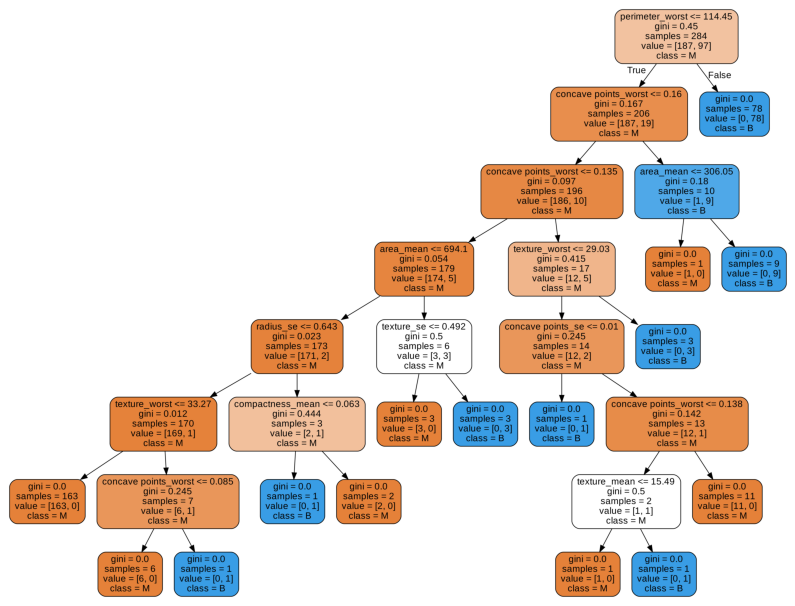

In [44]:
feature_names=["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]
export_graphviz(clf,out_file='cancer.dot',feature_names=feature_names,class_names=['M','B'], filled=True,rounded=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'cancer.dot', '-o', 'cancer.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('cancer.png'))
plt.axis('off')
plt.show()